# Group Project : Wine vs weather Analysis 

## Import of libraries 

In [1]:
import pandas as pd
import requests as r
import json
import time
import matplotlib.pyplot as plt
import re
import numpy as np

## Import of files 

In [2]:
path_data = r"C:\Users\galic156685\0323_2020DATAPAR\Projects"

data_w = pd.read_csv("2124520.csv",",")
data_v = pd.read_csv("vivino.csv")

## Merging of the wine data and the weather data

### Definition of the dictionnary 

In [3]:
dct_stations = {'bordeaux': 'BORDEAUX MERIGNAC, FR',
       'languedoc-roussillon':  'MONTPELLIER AEROPORT, FR',
       'cote-de-beaune': 'DIJON LONGVIC, FR',
       'cote-de-nuits': 'DIJON LONGVIC, FR' ,
       'rhone': 'LYON ST EXUPERY, FR',
       'loire-valley': 'NANTES BOUGUENAIS, FR',
       'bourgogne': 'DIJON LONGVIC, FR',
       'champagne': 'REIMS PRUNAY, FR',
       'alsace': 'STRASBOURG ENTZHEIM, FR',
       'chateauneuf-du-pape': 'MONTELIMAR, FR'}

### READ DF VIVINO

data_v['station']=data_v["vintage.wine.style.region.seo_name"].map(dct_stations)

#print(data_v.head())

#print(data_v.groupby('station').count())

data_w

,STATION,NAME,DATE,DX32,DX70,DX90,FZF2,PRCP,TAVG,TMAX,TMIN
0,FR000007510,"BORDEAUX MERIGNAC, FR",1980,0.0,98.0,2.0,21.0,36.06,54.0,62.2,45.8
1,FR000007510,"BORDEAUX MERIGNAC, FR",1981,0.0,123.0,6.0,NaN,38.97,55.8,64.2,47.4
2,FR000007510,"BORDEAUX MERIGNAC, FR",1982,0.0,127.0,3.0,NaN,45.89,56.4,64.8,48.1
3,FR000007510,"BORDEAUX MERIGNAC, FR",1983,0.0,134.0,8.0,23.0,34.12,56.1,64.6,47.6
4,FR000007510,"BORDEAUX MERIGNAC, FR",1984,0.0,114.0,6.0,NaN,46.99,54.7,63.2,46.3
...,...,...,...,...,...,...,...,...,...,...,...
275,FR000007190,"STRASBOURG ENTZHEIM, FR",2014,3.0,139.0,6.0,17.0,26.52,54.7,63.3,46.1
276,FR000007190,"STRASBOURG ENTZHEIM, FR",2015,0.0,122.0,22.0,NaN,18.69,54.1,63.1,45.1
277,FR000007190,"STRASBOURG ENTZHEIM, FR",2016,10.0,122.0,10.0,20.0,28.75,52.9,61.2,44.7
278,FR000007190,"STRASBOURG ENTZHEIM, FR",2017,11.0,139.0,14.0,NaN,23.79,53.5,62.4,44.6


### Merge of the two Dataframes

In [4]:
#Creation of the merge columns

data_v['join']=data_v.apply(lambda row:(str(row['station'])) +(str(row['vintage.year'])),axis=1)
data_w['join']=data_w.apply(lambda row:(str(row['NAME']))+(str(row['DATE'])),axis=1)

####### Merge of the 2 DateFrame

data=data_v.merge(data_w,on='join')

In [5]:
data_v.isna().sum()
data_w.isna().sum()

STATION      0
NAME         0
DATE         0
DX32        13
DX70        13
DX90        13
FZF2       133
PRCP         0
TAVG        14
TMAX        13
TMIN        14
join         0
dtype: int64

In [6]:
data_v["vintage.year"]=data_v["vintage.year"].replace("N.V.",0)

## Data Cleaning of the new database

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8654 entries, 0 to 8653
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          8654 non-null   int64  
 1   vintage.id                          8654 non-null   int64  
 2   vintage.wine.winery.seo_name        8654 non-null   object 
 3   vintage.wine.winery.name            8654 non-null   object 
 4   vintage.wine.name                   8654 non-null   object 
 5   vintage.year                        8654 non-null   object 
 6   vintage.statistics.ratings_average  8654 non-null   float64
 7   vintage.wine.region.name            8654 non-null   object 
 8   vintage.wine.region.seo_name        8654 non-null   object 
 9   vintage.wine.style.region.seo_name  8654 non-null   object 
 10  station                             8654 non-null   object 
 11  join                                8654 no

In [8]:
data.columns

Index(['Unnamed: 0', 'vintage.id', 'vintage.wine.winery.seo_name',
       'vintage.wine.winery.name', 'vintage.wine.name', 'vintage.year',
       'vintage.statistics.ratings_average', 'vintage.wine.region.name',
       'vintage.wine.region.seo_name', 'vintage.wine.style.region.seo_name',
       'station', 'join', 'STATION', 'NAME', 'DATE', 'DX32', 'DX70', 'DX90',
       'FZF2', 'PRCP', 'TAVG', 'TMAX', 'TMIN'],
      dtype='object')

In [9]:
#Cleaning column
data = data[['vintage.wine.winery.name', 'vintage.wine.region.name','vintage.statistics.ratings_average', 'vintage.wine.style.region.seo_name','NAME','DATE','PRCP', 'TAVG', 'TMAX','TMIN','DX32', 'DX70', 'DX90',
       'FZF2']]
data=data.rename(columns={'DATE':'year','vintage.wine.winery.name':'domaine','vintage.wine.region.name':'appelation','vintage.statistics.ratings_average':'rate'})
data

,domaine,appelation,rate,vintage.wine.style.region.seo_name,NAME,year,PRCP,TAVG,TMAX,TMIN,DX32,DX70,DX90,FZF2
0,Château Batailley,Pauillac,4.1,bordeaux,"BORDEAUX MERIGNAC, FR",2013,41.35,56.5,64.5,48.6,0.0,125.0,12.0,NaN
1,Château Rouget,Pomerol,3.9,bordeaux,"BORDEAUX MERIGNAC, FR",2013,41.35,56.5,64.5,48.6,0.0,125.0,12.0,NaN
2,Château Latour,Pauillac,4.2,bordeaux,"BORDEAUX MERIGNAC, FR",2013,41.35,56.5,64.5,48.6,0.0,125.0,12.0,NaN
3,Château Meyney,Saint-Estèphe,3.8,bordeaux,"BORDEAUX MERIGNAC, FR",2013,41.35,56.5,64.5,48.6,0.0,125.0,12.0,NaN
4,Château Olivier,Pessac-Léognan,3.9,bordeaux,"BORDEAUX MERIGNAC, FR",2013,41.35,56.5,64.5,48.6,0.0,125.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,Domaine de la Mordoree,Châteauneuf-du-Pape,4.3,chateauneuf-du-pape,"MONTELIMAR, FR",1998,33.28,56.3,65.1,47.6,0.0,138.0,16.0,23.0
8650,Domaine de la Mordoree,Châteauneuf-du-Pape,4.3,chateauneuf-du-pape,"MONTELIMAR, FR",1998,33.28,56.3,65.1,47.6,0.0,138.0,16.0,23.0
8651,Domaine de la Mordoree,Châteauneuf-du-Pape,4.3,chateauneuf-du-pape,"MONTELIMAR, FR",1998,33.28,56.3,65.1,47.6,0.0,138.0,16.0,23.0
8652,Domaine de la Mordoree,Châteauneuf-du-Pape,4.3,chateauneuf-du-pape,"MONTELIMAR, FR",1998,33.28,56.3,65.1,47.6,0.0,138.0,16.0,23.0


In [11]:
data.NAME.value_counts()

BORDEAUX MERIGNAC, FR       6689
DIJON LONGVIC, FR           1137
LYON ST EXUPERY, FR          299
MONTELIMAR, FR               187
MONTPELLIER AEROPORT, FR     151
NANTES BOUGUENAIS, FR        145
STRASBOURG ENTZHEIM, FR       37
REIMS PRUNAY, FR               9
Name: NAME, dtype: int64

## Analyis of the data

In [12]:
bdx=data[data.NAME=='BORDEAUX MERIGNAC, FR']
cdn=data[(data.NAME=='DIJON LONGVIC, FR') & (data['vintage.wine.style.region.seo_name']=='cote-de-beaune')]
cdb=data[(data.NAME=='DIJON LONGVIC, FR') & (data['vintage.wine.style.region.seo_name']=='cote-de-nuit')]
lr=data[data.NAME=='MONTPELLIER AEROPORT, FR']
rh=data[data.NAME=='LYON ST EXUPERY, FR']
lv=data[data.NAME=='NANTES BOUGUENAIS, FR']
chmp=data[data.NAME=='REIMS PRUNAY, FR']
als=data[data.NAME=='STRASBOURG ENTZHEIM, FR']
cdp=data[data.NAME=='MONTELIMAR, FR']
brg=data[(data.NAME=='DIJON LONGVIC, FR') & (data['vintage.wine.style.region.seo_name']=='bourgogne')]

In [13]:
bdx[['year','domaine','rate']].groupby(['domaine',"year"]).agg('mean').nlargest(10,'rate')

,,rate
domaine,year,
Château Ausone,2003,4.8
Château Cheval Blanc,1990,4.8
Château Haut-Brion,1990,4.7
Château Mouton Rothschild,2000,4.7
Château Lafite Rothschild,2016,4.7
Château Pavie,2015,4.7
Pétrus,2008,4.7
Château Angelus,1997,4.7
Château Ausone,2006,4.7


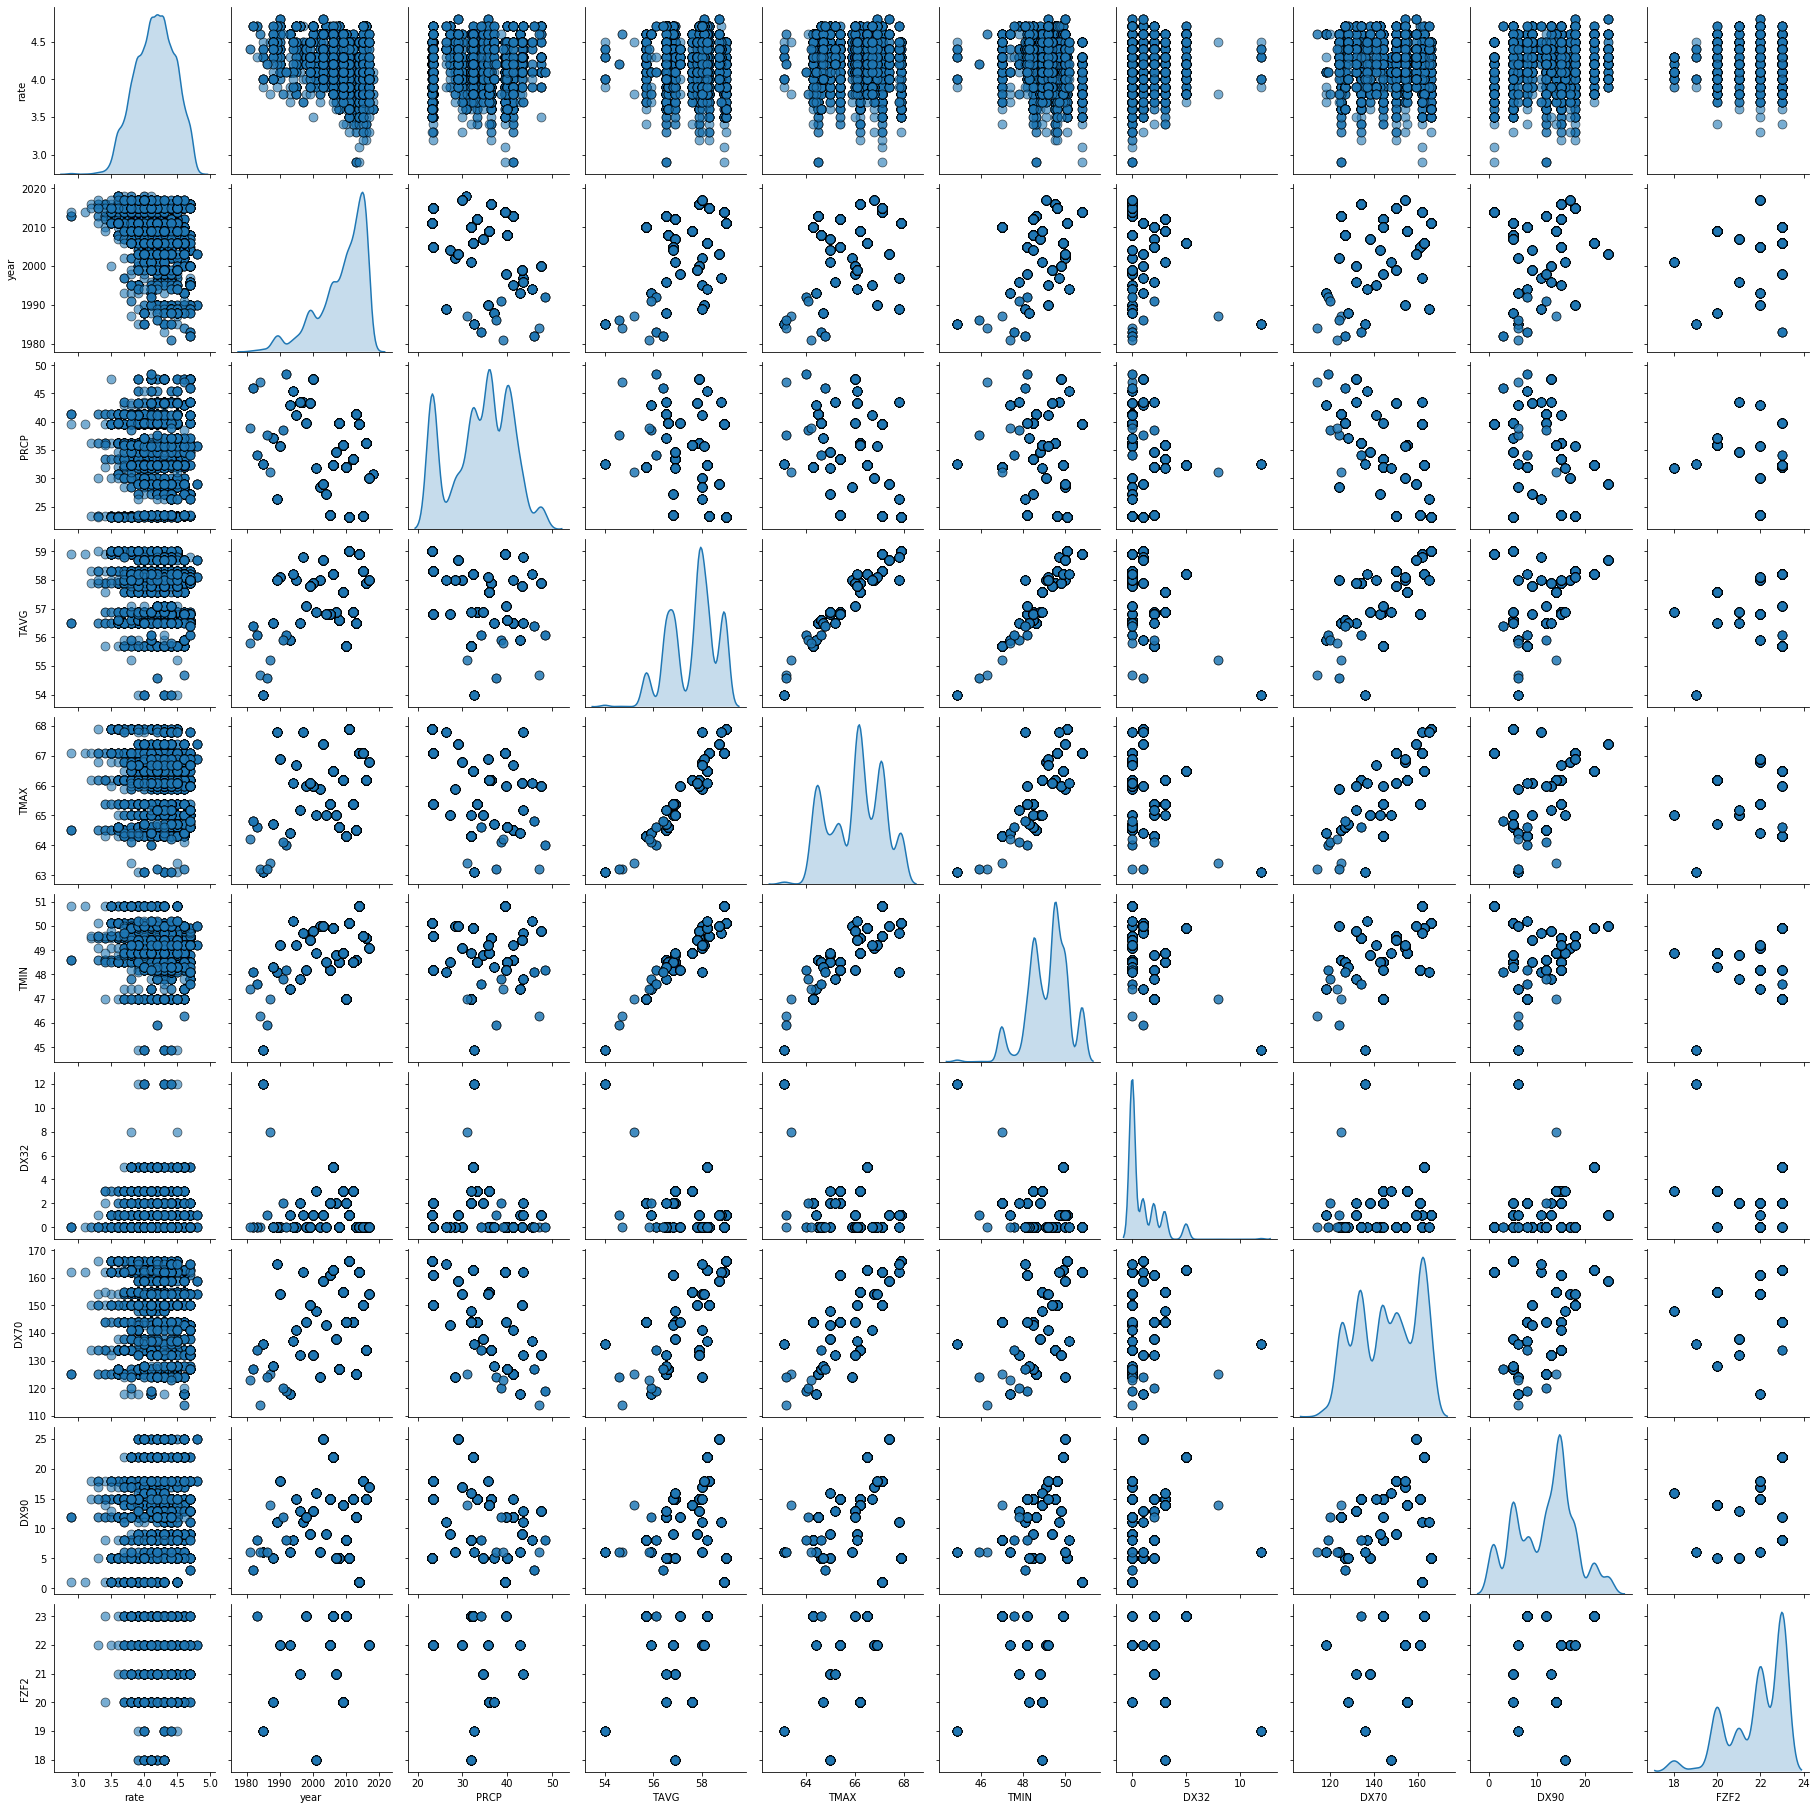

In [14]:
import seaborn as sns
sns.pairplot(bdx, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

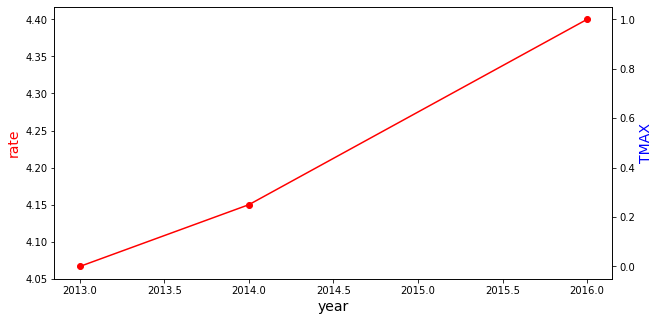

In [15]:
a=chmp.groupby("year")["rate"].agg("mean").reset_index()
b=chmp.groupby("year")["TMAX"].agg("mean").reset_index()

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize= (10,5))
# make a plot
ax.plot(a.year, a.rate, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("rate",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(b.year, b.TMAX,color="blue",marker="o")
ax2.set_ylabel("TMAX",color="blue",fontsize=14)
plt.show()

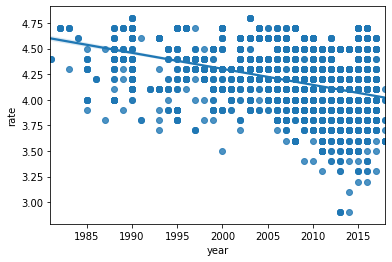

In [16]:
sns.regplot(bdx.year, bdx.rate, scatter=True)

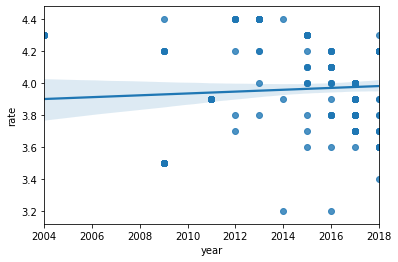

In [17]:
sns.regplot(brg.year, brg.rate, scatter=True)